In [1]:
%reload_ext autoreload
%autoreload 
%matplotlib inline

In [ ]:
Importing the libraries 

In [2]:
from fastai import *
from fastai.vision import *
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
To get the version of fastai that is currently used

In [3]:
!pip show fastai

Name: fastai
Version: 1.0.28
Summary: fastai makes deep learning with PyTorch faster, more accurate, and easier
Home-page: https://github.com/fastai/fastai
Author: Jeremy Howard
Author-email: info@fast.ai
License: Apache Software License 2.0
Location: /opt/anaconda3/lib/python3.6/site-packages
Requires: fastprogress, matplotlib, numpy, pandas, bottleneck, numexpr, Pillow, requests, scipy, spacy, regex, thinc, cymem, torchvision-nightly, typing, pyyaml, dataclasses
Required-by: 


In [ ]:
Credits to University of Jaffna, Srilanka. The dataset has 125 dataclasses. Each with 100 images. These are not handwritten data. 

In [4]:
!wget http://www.jfn.ac.lk/wp-content/uploads/2016/04/UJTDchar.zip  && unzip -qq UJTDchar.zip -d data_tamil/ 


--2018-12-01 06:13:07--  http://www.jfn.ac.lk/wp-content/uploads/2016/04/UJTDchar.zip
Resolving www.jfn.ac.lk (www.jfn.ac.lk)... 192.248.56.21
Connecting to www.jfn.ac.lk (www.jfn.ac.lk)|192.248.56.21|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13784829 (13M) [application/zip]
Saving to: ‘UJTDchar.zip.4’

UJTDchar.zip.4      100%[===================>]  13.15M  5.71MB/s    in 2.3s    

2018-12-01 06:13:10 (5.71 MB/s) - ‘UJTDchar.zip.4’ saved [13784829/13784829]



In [4]:
pwd

'/home/jupyter/workingfiles'

In [5]:
path = Path("data_tamil/UJTDchar/")

In [6]:
path

PosixPath('data_tamil/UJTDchar')

In [7]:
path.ls()

[PosixPath('data_tamil/UJTDchar/ழீ'),
 PosixPath('data_tamil/UJTDchar/ச'),
 PosixPath('data_tamil/UJTDchar/ளீ'),
 PosixPath('data_tamil/UJTDchar/ஞ்'),
 PosixPath('data_tamil/UJTDchar/test_image'),
 PosixPath('data_tamil/UJTDchar/கூ'),
 PosixPath('data_tamil/UJTDchar/றி'),
 PosixPath('data_tamil/UJTDchar/னூ'),
 PosixPath('data_tamil/UJTDchar/ழ'),
 PosixPath('data_tamil/UJTDchar/டி'),
 PosixPath('data_tamil/UJTDchar/பூ'),
 PosixPath('data_tamil/UJTDchar/ள்'),
 PosixPath('data_tamil/UJTDchar/ழ்'),
 PosixPath('data_tamil/UJTDchar/று'),
 PosixPath('data_tamil/UJTDchar/ர'),
 PosixPath('data_tamil/UJTDchar/ச்'),
 PosixPath('data_tamil/UJTDchar/நீ'),
 PosixPath('data_tamil/UJTDchar/மூ'),
 PosixPath('data_tamil/UJTDchar/ஞூ'),
 PosixPath('data_tamil/UJTDchar/லீ'),
 PosixPath('data_tamil/UJTDchar/ஏ'),
 PosixPath('data_tamil/UJTDchar/ணி'),
 PosixPath('data_tamil/UJTDchar/ணீ'),
 PosixPath('data_tamil/UJTDchar/ள'),
 PosixPath('data_tamil/UJTDchar/லூ'),
 PosixPath('data_tamil/UJTDchar/வ'),
 PosixPath

In [14]:
bs = 64

tfms = get_transforms(do_flip=False)

data = (ImageItemList.from_folder(path)
        .random_split_by_pct()
        .label_from_folder()
        .transform(tfms,size=224)
        .databunch())


In [ ]:
doc(ImageItemList)


In [ ]:
Visualising data in the dataset.

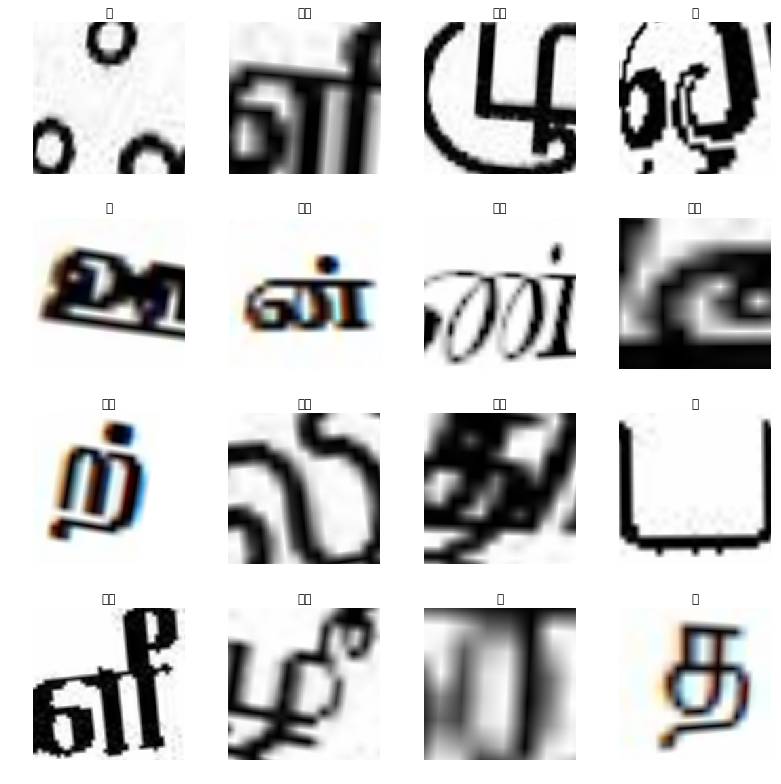

In [15]:
data.show_batch(rows=4, figsize=(11,11))


In [16]:
print(data.classes)


['ழீ', 'ச', 'ளீ', 'ஞ்', 'test_image', 'கூ', 'றி', 'னூ', 'ழ', 'டி', 'பூ', 'ள்', 'ழ்', 'று', 'ர', 'ச்', 'நீ', 'மூ', 'ஞூ', 'லீ', 'ஏ', 'ணி', 'ணீ', 'ள', 'லூ', 'வ', 'ம்', 'ஙி', 'ல', 'ன்', 'ற்', 'பு', 'ஙீ', 'நி', 'ே', 'ணு', 'ட', 'சீ', 'னி', 'இ', 'யூ', 'வ்', 'ங்', 'ந', 'வீ', 'ந்', 'வூ', 'கி', 'த', 'ண', 'தூ', 'ண்', 'ழூ', 'ப', 'ஞு', 'ப்', 'ஙூ', 'அ', 'ஓ', 'ஊ', 'யு', 'ளு', 'ர்', 'ஞீ', 'லு', 'டூ', 'ரூ', 'பீ', 'த்', 'சூ', 'ஃ', 'யீ', 'றூ', 'யி', 'ஐ', 'தீ', 'ம', 'சி', 'டு', 'ஙு', 'ய', 'வி', 'ரீ', 'லி', 'ட்', 'பி', 'ழி', 'ஈ', 'வு', 'ற', 'நு', 'ய்', 'ரி', 'னு', 'ெ', 'ா', 'நூ', 'தி', 'மி', 'ஒ', 'ஞ', 'ரு', 'ல்', 'கீ', 'து', 'னீ', 'மு', 'ளி', 'றீ', 'க', 'ங', 'ஆ', 'ை', 'ழு', 'மீ', 'உ', 'ளூ', 'கு', 'சு', 'டீ', 'ணூ', 'ன', 'எ', 'க்', 'ஞி']


In [17]:
len(data.classes)


125

In [ ]:
Now we will start training our model. 
We will use a [convolutional neural network](http://cs231n.github.io/convolutional-networks/)

In [18]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)


In [ ]:
We will train for 4 epochs (4 cycles through all our data).The default Learning rate is 3e-3.

In [19]:
learn.fit_one_cycle(4)


Total time: 03:20
epoch  train_loss  valid_loss  error_rate
1      4.101843    2.752698    0.663442    (00:50)
2      2.081535    0.984457    0.297864    (00:48)
3      1.278348    0.611190    0.190246    (00:49)
4      1.103683    0.561033    0.171302    (00:51)



In [ ]:
Save the model.

In [20]:
learn.save('stage-1-resnet34')


In [ ]:
We will first see which were the categories that the model most confused with one another.
We will try to see if what the model predicted was reasonable or not. 
In this case the mistakes look reasonable (none of the mistakes seems obviously naive). 
This is an indicator that our classifier is working correctly.


In [21]:
interp = ClassificationInterpretation.from_learner(learn)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


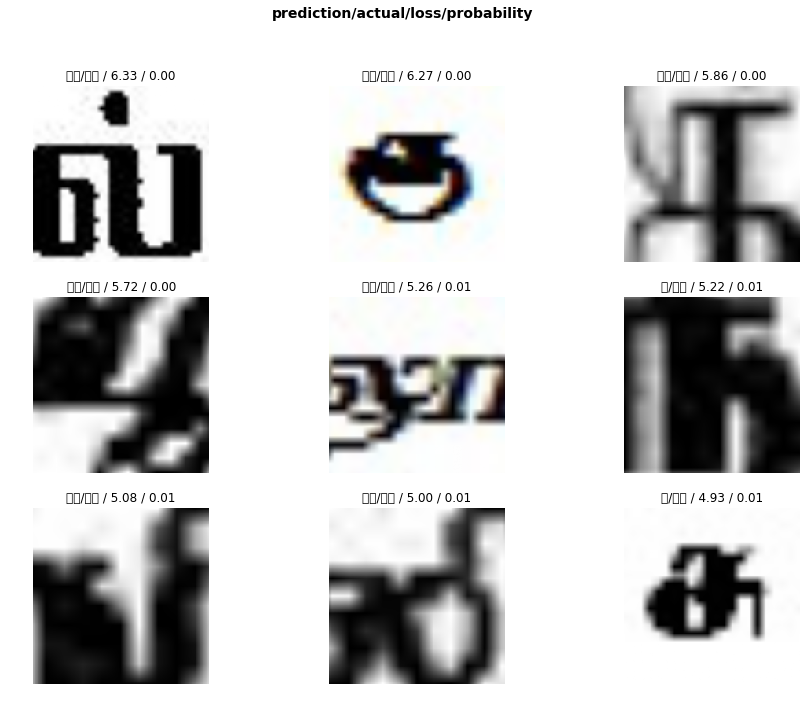

In [22]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
Furthermore, when we plot the confusion matrix, we can see that the distribution is heavily skewed:


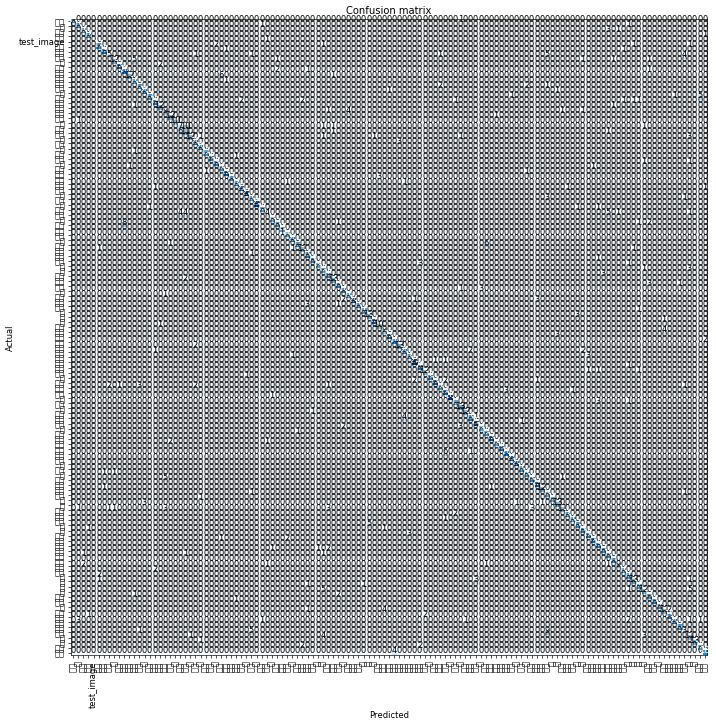

In [133]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [23]:
interp.most_confused(min_val=2)

[('ளூ', 'ளு', 12),
 ('ணூ', 'னு', 11),
 ('ணீ', 'ணி', 10),
 ('ழூ', 'ழு', 10),
 ('ன', 'ண', 9),
 ('ளி', 'ளீ', 8),
 ('ணி', 'ணீ', 7),
 ('ரு', 'ரூ', 7),
 ('ை', 'ண', 7),
 ('ஓ', 'ஒ', 6),
 ('ய', 'ப', 6),
 ('ழு', 'ழூ', 6),
 ('மூ', 'மு', 5),
 ('ணு', 'ணூ', 5),
 ('னி', 'ணி', 5),
 ('நு', 'நூ', 5),
 ('நூ', 'ஞூ', 5),
 ('ஒ', 'ஓ', 5),
 ('ழ', 'ழ்', 4),
 ('ழ்', 'ழி', 4),
 ('ச்', 'க்', 4),
 ('ன்', 'ண்', 4),
 ('ஞு', 'ஞூ', 4),
 ('டு', 'டூ', 4),
 ('பி', 'யி', 4),
 ('னூ', 'னு', 3),
 ('று', 'றூ', 3),
 ('லீ', 'லி', 3),
 ('ள', 'ண', 3),
 ('னி', 'ணீ', 3),
 ('னி', 'னீ', 3),
 ('யூ', 'பூ', 3),
 ('ப', 'ய', 3),
 ('றூ', 'று', 3),
 ('யி', 'பி', 3),
 ('வி', 'வீ', 3),
 ('னு', 'னூ', 3),
 ('னீ', 'ணி', 3),
 ('னீ', 'ணீ', 3),
 ('ணூ', 'னூ', 3)]

In [24]:
learn.load('stage-1-resnet34')


Learner(data=ImageDataBunch;
Train: LabelList
y: CategoryList (9924 items)
[Category ழீ, Category ழீ, Category ழீ, Category ழீ, Category ழீ]...
Path: data_tamil/UJTDchar
x: ImageItemList (9924 items)
[Image (3, 17, 20), Image (3, 27, 24), Image (3, 20, 18), Image (3, 26, 21), Image (3, 26, 23)]...
Path: data_tamil/UJTDchar;
Valid: LabelList
y: CategoryList (2481 items)
[Category ஞ், Category நி, Category றி, Category உ, Category ன்]...
Path: data_tamil/UJTDchar
x: ImageItemList (2481 items)
[Image (3, 24, 26), Image (3, 22, 19), Image (3, 17, 20), Image (3, 36, 67), Image (3, 22, 21)]...
Path: data_tamil/UJTDchar;
Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
   

In [ ]:
Finding the learning rate using lr_find and training with the learning rates where the losses are minimum.
Here we can see between 1e-6 and 1e-4 .


In [25]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


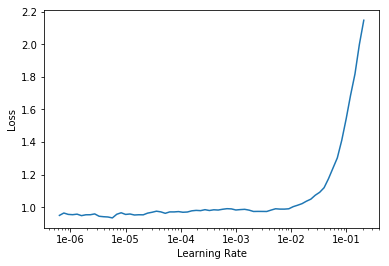

In [26]:
learn.recorder.plot()

In [27]:
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))


Total time: 02:32
epoch  train_loss  valid_loss  error_rate
1      1.035328    0.557091    0.167674    (00:50)
2      1.008511    0.544790    0.166868    (00:50)
3      0.999479    0.542397    0.170093    (00:51)



In [28]:
learn.save('stage1-resnet34-lr-tuning')

In [29]:
learn.load('stage-1-resnet34')


Learner(data=ImageDataBunch;
Train: LabelList
y: CategoryList (9924 items)
[Category ழீ, Category ழீ, Category ழீ, Category ழீ, Category ழீ]...
Path: data_tamil/UJTDchar
x: ImageItemList (9924 items)
[Image (3, 17, 20), Image (3, 27, 24), Image (3, 20, 18), Image (3, 26, 21), Image (3, 26, 23)]...
Path: data_tamil/UJTDchar;
Valid: LabelList
y: CategoryList (2481 items)
[Category ஞ், Category நி, Category றி, Category உ, Category ன்]...
Path: data_tamil/UJTDchar
x: ImageItemList (2481 items)
[Image (3, 24, 26), Image (3, 22, 19), Image (3, 17, 20), Image (3, 36, 67), Image (3, 22, 21)]...
Path: data_tamil/UJTDchar;
Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
   

In [30]:
learn.unfreeze()

In [31]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


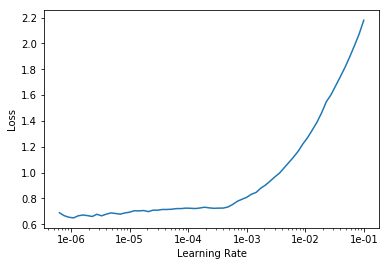

In [26]:
learn.recorder.plot()


In [32]:
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-5))


Total time: 04:33
epoch  train_loss  valid_loss  error_rate
1      0.998840    0.541594    0.166868    (01:09)
2      0.906765    0.504203    0.150746    (01:09)
3      0.903659    0.488122    0.149536    (01:07)
4      0.891772    0.489692    0.148730    (01:07)



In [33]:
learn.save('stage2-resnet-all-layers')

In [34]:
learn.load('stage-1-resnet34')

Learner(data=ImageDataBunch;
Train: LabelList
y: CategoryList (9924 items)
[Category ழீ, Category ழீ, Category ழீ, Category ழீ, Category ழீ]...
Path: data_tamil/UJTDchar
x: ImageItemList (9924 items)
[Image (3, 17, 20), Image (3, 27, 24), Image (3, 20, 18), Image (3, 26, 21), Image (3, 26, 23)]...
Path: data_tamil/UJTDchar;
Valid: LabelList
y: CategoryList (2481 items)
[Category ஞ், Category நி, Category றி, Category உ, Category ன்]...
Path: data_tamil/UJTDchar
x: ImageItemList (2481 items)
[Image (3, 24, 26), Image (3, 22, 19), Image (3, 17, 20), Image (3, 36, 67), Image (3, 22, 21)]...
Path: data_tamil/UJTDchar;
Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
   

In [35]:
filename = 'data_tamil/UJTDchar/test_image/img_fromds.jpg'


In [36]:
img = open_image(filename)
losses = learn.predict(img)
prediction = losses[0];
prediction

'அ'

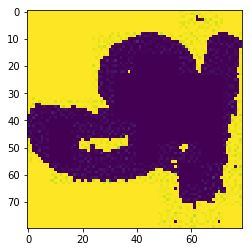

In [37]:
img=mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

In [38]:
filename = 'data_tamil/UJTDchar/test_image/tamil_1.png'


In [39]:
img = open_image(filename)
losses = learn.predict(img)
prediction = losses[0];
prediction

'இ'

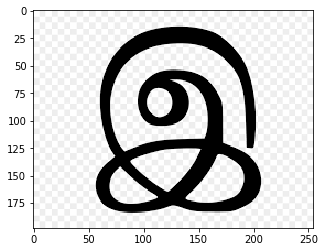

In [40]:
img=mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

In [ ]:
learn.load('stage2-resnet-all-layers')